<a href="https://colab.research.google.com/github/aghosh92/polar_organic/blob/main/Notebook_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook shows an example implementation of imprtance sampling as utilized for organic ferroelectric compounds.
[Paper link](https://arxiv.org/abs/2108.13206)




### Author: Ayana Ghosh

Email: research.aghosh@gmail.com

Install packages

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=53d781247dd0da6e85033d5776e3b9c5460b9d60abf4a0094701f4f315ea3372
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


Import essential libraries

In [3]:
import wget
import pandas as pd
import numpy as np
import plotly.express as px
from pandas import json_normalize
from scipy import stats as st
from numpy import genfromtxt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

Read in the Data (.csv files)

In [38]:
!wget -O data_orig_no_header.csv https://www.dropbox.com/scl/fi/u96yq22lrej2rlzavlytz/data_orig_no_header.csv?rlkey=hikqjjw9vlmdyolgl7swcplph&dl=0

filename1 = 'data_orig_no_header.csv'
real_data = genfromtxt(filename1, delimiter=',')

--2023-10-11 19:59:00--  https://www.dropbox.com/scl/fi/u96yq22lrej2rlzavlytz/data_orig_no_header.csv?rlkey=hikqjjw9vlmdyolgl7swcplph
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc702a474fc835ebe5d4ed0b544e.dl.dropboxusercontent.com/cd/0/inline/CFYAu-wuF-EUjxA-Zf8pqxPOddZ4WSWzyfUtQu_y8NInRx39r3QmZg5dm5g21ymIY_zjU8Qd83n9i5euoi_yL8PZOW-mFLa5e1oDYLe3-ZKe-hPvPKtF1a7SIVVUwLFywiaTjkUPCexTiIoCZ_JUbe_M/file# [following]
--2023-10-11 19:59:05--  https://uc702a474fc835ebe5d4ed0b544e.dl.dropboxusercontent.com/cd/0/inline/CFYAu-wuF-EUjxA-Zf8pqxPOddZ4WSWzyfUtQu_y8NInRx39r3QmZg5dm5g21ymIY_zjU8Qd83n9i5euoi_yL8PZOW-mFLa5e1oDYLe3-ZKe-hPvPKtF1a7SIVVUwLFywiaTjkUPCexTiIoCZ_JUbe_M/file
Resolving uc702a474fc835ebe5d4ed0b544e.dl.dropboxusercontent.com (uc702a474fc835ebe5d4ed0b544e.dl.dropboxusercontent.com)... 162.125.3

<Axes: ylabel='Count'>

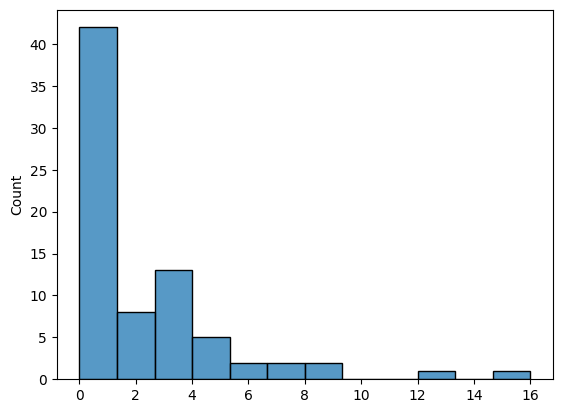

In [42]:
nrows, ncols = real_data.shape
np.isnan(real_data).any()
#distribution of data points
sns.histplot(real_data[:,ncols-1])

In [43]:
#count the number of datapoints more than particular polarization value
#check the last column in the data for this check
count1 = 0
pol_value = 5.0
for r in range(nrows):
    if real_data[r][ncols-1] >= pol_value:
        count1 += 1
        print("row id : " + str(r))
print(count1)

row id : 6
row id : 11
row id : 12
row id : 13
row id : 70
row id : 71
row id : 72
row id : 73
row id : 74
row id : 75
10


In [45]:
#extract the subset of datapoints with polarization value more that "pol_val"
high_polarization_subset = np.zeros((count1,ncols))
c = 0
for r in range(nrows):
    if real_data[r][ncols-1] >= pol_value:
        high_polarization_subset[c] = real_data[r]
        c += 1

<Axes: ylabel='Count'>

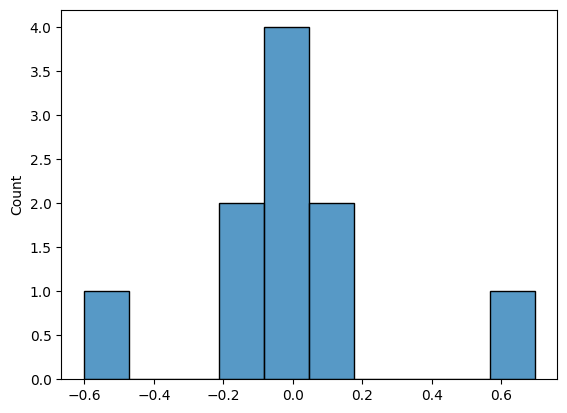

In [46]:
pca = PCA()
transformed_data = pca.fit_transform(high_polarization_subset)
sns.histplot(transformed_data[:,8])

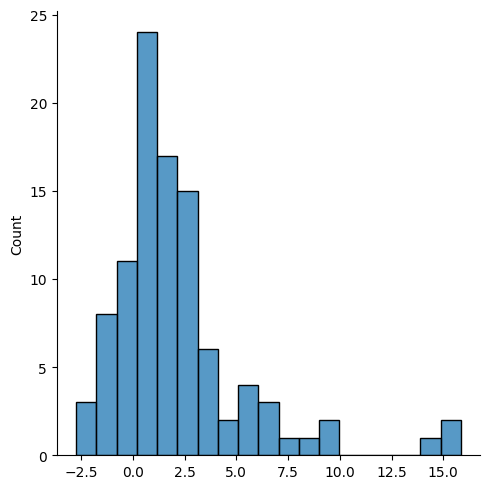

In [47]:
my_kde = st.gaussian_kde(real_data[:,ncols-1])
sample = my_kde.resample(100).reshape((100,))
sns.displot(sample)

Perform sampling for the principal components

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

In [ ]:
num_sample = 100
nrows1, npc = transformed_data.shape
sampled_data = np.zeros((num_sample, npc))

#set the gaussian width as desired, or leave it default
## subhashis: here I used a very tight bandwidth
for pc in range(npc):
    kde_obj = st.gaussian_kde(transformed_data[:,pc], bw_method=0.02)
    #print(kde_obj.factor)
    sampled = kde_obj.resample(num_sample).reshape((num_sample,))
    for i in range(num_sample):
        sampled_data[i][pc] = sampled[i]
#inverse transform
sampled_data_original_space = pca.inverse_transform(sampled_data)

(array([1., 0., 0., 0., 0., 0., 1., 1., 2., 2., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([-0.60143538, -0.53656834, -0.4717013 , -0.40683426, -0.34196722,
        -0.27710018, -0.21223314, -0.1473661 , -0.08249906, -0.01763202,
         0.04723502,  0.11210206,  0.1769691 ,  0.24183614,  0.30670318,
         0.37157022,  0.43643726,  0.5013043 ,  0.56617134,  0.63103838,
         0.69590542]),
 <BarContainer object of 20 artists>)

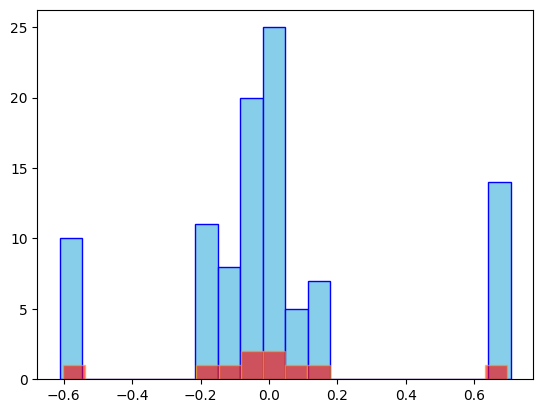

In [54]:
#plot sampled data
plt.hist(sampled_data[:,8], bins=20, label='Sampled data', color = "skyblue",ec="blue")
plt.hist(transformed_data[:,8], alpha = 0.6, bins=20, label='Transformed data', color = "red",ec="orange")